# Nursing Home Covid-19 Data Analysis

Mount Google Drive

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

In [34]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

import plotly.express as px

### Read Data

In [2]:
raw_data = pd.read_csv('/content/drive/MyDrive/Northeastern/Labs/IE5374/NursingHome/COVID-19 Nursing Home Data 08.28.2022.csv')
raw_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,41,42,43,44,45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Percentage of Current Residents Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Residents with a Completed Vaccination Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel with a Completed Vaccination Staying in this Facility for At Least 1 Day This Week who Received a COVID-19 Vaccine Booster at Any Time,Recent Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Healthcare Personnel with a Completed Vaccination Up to Date with COVID-19 Vaccines
0,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

print("Number of rows: {}".format(raw_data.shape[0]))
print("Number of cols: {}".format(raw_data.shape[1]))

Number of rows: 1816451
Number of cols: 120


## Data Investigation

### Dimension Dictionary

In [4]:
dim_dict = {}
for i in range(raw_data.shape[1]):
    # dim_dict["col" + str(i+1)] = raw_data.columns[i]
    dim_dict[raw_data.columns[i]] = "Col" + str(i)

# # create list of original column names and transformed column names
# og_list = list(dim_dict.values())
# tf_list = list(dim_dict.keys())


In [5]:
# function to return key for any value
# https://www.geeksforgeeks.org/python-get-key-from-value-in-dictionary/
def get_key(ddict, val):
    for key, value in ddict.items():
        if val == value:
            return key

### Transform Column Names

In [6]:
tf_data = raw_data.copy(deep=True)
tf_data.rename(columns=dim_dict, inplace=True)
tf_data.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col110,Col111,Col112,Col113,Col114,Col115,Col116,Col117,Col118,Col119
0,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# tf_data = raw_data.copy(deep=True)
# for i in range(tf_data.shape[1]):
#     tf_data.columns.values[i] = tf_list[i]
# tf_data.head()

In [8]:
# original data
raw_data.head()

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Percentage of Current Residents Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Residents with a Completed Vaccination Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel with a Completed Vaccination Staying in this Facility for At Least 1 Day This Week who Received a COVID-19 Vaccine Booster at Any Time,Recent Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Healthcare Personnel with a Completed Vaccination Up to Date with COVID-19 Vaccines
0,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
tf_data.describe()

,Col6,Col7,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,...,Col110,Col111,Col112,Col113,Col114,Col115,Col116,Col117,Col118,Col119
count,1.816451e+06,1.816451e+06,1.796547e+06,1.796547e+06,1.796547e+06,1.796547e+06,1.796547e+06,1.796547e+06,1.796547e+06,1.796547e+06,...,968017.000000,968017.000000,785499.000000,14761.000000,967779.000000,188491.000000,14761.000000,967779.000000,967779.000000,967779.000000
mean,5.031145e+04,5.876505e+09,2.632105e-01,1.851226e+01,6.707083e-01,4.374520e+01,4.748437e-01,3.337861e+01,8.674418e-02,7.750832e+00,...,11.334818,12.674279,41.463624,55.661688,28.071264,61.565666,42.913605,8.682264,8.767077,9.734536
std,2.683933e+04,2.331702e+09,1.601575e+00,5.091688e+01,3.203611e+00,4.305624e+01,1.900089e+00,5.425571e+01,7.190060e-01,1.035255e+01,...,26.839732,29.644533,56.332304,26.410771,29.809028,63.514260,27.670881,21.655041,21.857298,23.696917
min,6.600000e+02,1.112223e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.982400e+04,3.867585e+09,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,4.000000,35.971000,0.000000,21.000000,21.488000,0.000000,0.000000,0.000000
50%,4.880100e+04,6.058923e+09,0.000000e+00,4.000000e+00,0.000000e+00,3.500000e+01,0.000000e+00,2.300000e+01,0.000000e+00,5.000000e+00,...,0.000000,0.000000,25.000000,53.179000,21.538000,45.000000,38.554000,0.000000,0.000000,0.000000
75%,7.285500e+04,8.022290e+09,0.000000e+00,1.600000e+01,0.000000e+00,6.600000e+01,1.000000e+00,4.400000e+01,0.000000e+00,1.100000e+01,...,0.000000,0.000000,56.000000,75.000000,47.154000,82.000000,62.069000,0.000000,0.000000,0.000000
max,9.992900e+04,1.000000e+10,4.460000e+02,1.726000e+03,3.120000e+02,6.020000e+02,9.860000e+02,2.988000e+03,8.900000e+01,1.390000e+02,...,100.000000,100.000000,1748.000000,100.000000,100.000000,1747.000000,100.000000,100.000000,100.000000,100.000000


### Numeric and Categorical Features

In [10]:
num_dims = tf_data.columns[tf_data.dtypes != object]
cat_dims = tf_data.columns[tf_data.dtypes == object]

print("Number of numerical dimensions = {}".format(len(num_dims)))
print("Number of categorical dimensions = {}".format(len(cat_dims)))

Number of numerical dimensions = 98
Number of categorical dimensions = 22


### Null Value Counts

In [11]:
print("Column Name -> Number of Null Values ")
print("=======================================================================")
nulls = tf_data.isnull().sum().to_frame()
for index, row in nulls.iterrows(): 
    print(get_key(dim_dict, index), " -> ", row[0])

Column Name -> Number of Null Values 
Week Ending  ->  0
Federal Provider Number  ->  0
Provider Name  ->  0
Provider Address  ->  0
Provider City  ->  0
Provider State  ->  0
Provider Zip Code  ->  0
Provider Phone Number  ->  0
County  ->  0
Submitted Data  ->  0
Passed Quality Assurance Check  ->  13292
Residents Weekly Admissions COVID-19  ->  19904
Residents Total Admissions COVID-19  ->  19904
Residents Weekly Confirmed COVID-19  ->  19904
Residents Total Confirmed COVID-19  ->  19904
Residents Weekly All Deaths  ->  19904
Residents Total All Deaths  ->  19904
Residents Weekly COVID-19 Deaths  ->  19904
Residents Total COVID-19 Deaths  ->  19904
Number of All Beds  ->  30115
Total Number of Occupied Beds  ->  26775
Staff Weekly Confirmed COVID-19  ->  19904
Staff Total Confirmed COVID-19  ->  19904
Staff Weekly COVID-19 Deaths  ->  19904
Staff Total COVID-19 Deaths  ->  19904
Shortage of Nursing Staff  ->  180413
Shortage of Clinical Staff  ->  180452
Shortage of Aides  ->  18041

In [12]:
# function to get unique count per column in a data frame
def uniq_cnt_col(df):
    tot_cnt = df.count()
    # Count total number of non-null values
    tmp_df = pd.DataFrame(data=tot_cnt)
    tmp_df.columns = ['Total_NotNull'] 
    distincts = []
    for col in df.columns:
        # Get number of distinct values for each column
        distinct = df[col].nunique() 
        distincts.append(distinct)
    tmp_df['Distincts'] = distincts
    return tmp_df
    # return(np.transpose(tmp_df))

## Data Analytics

### Find the number of facilities in each state

In [32]:
fac_df = tf_data.groupby(by='Col5', as_index=False)['Col1'].count()
sorted_fac_state = fac_df.sort_values(by='Col1', ascending=False)

In [38]:
px.bar(sorted_fac_state, x='Col5', y='Col1', color='Col5',
       labels={'Col5':str(get_key(dim_dict, 'Col5')),
               'Col1':'Count of Facilities'}, height=400)

# plt.figure(figsize=(15,9))
# sns.barplot(x='Col5', y='Col1', data=sorted_fac_state)

## Visualization

### Correlation HeatMap

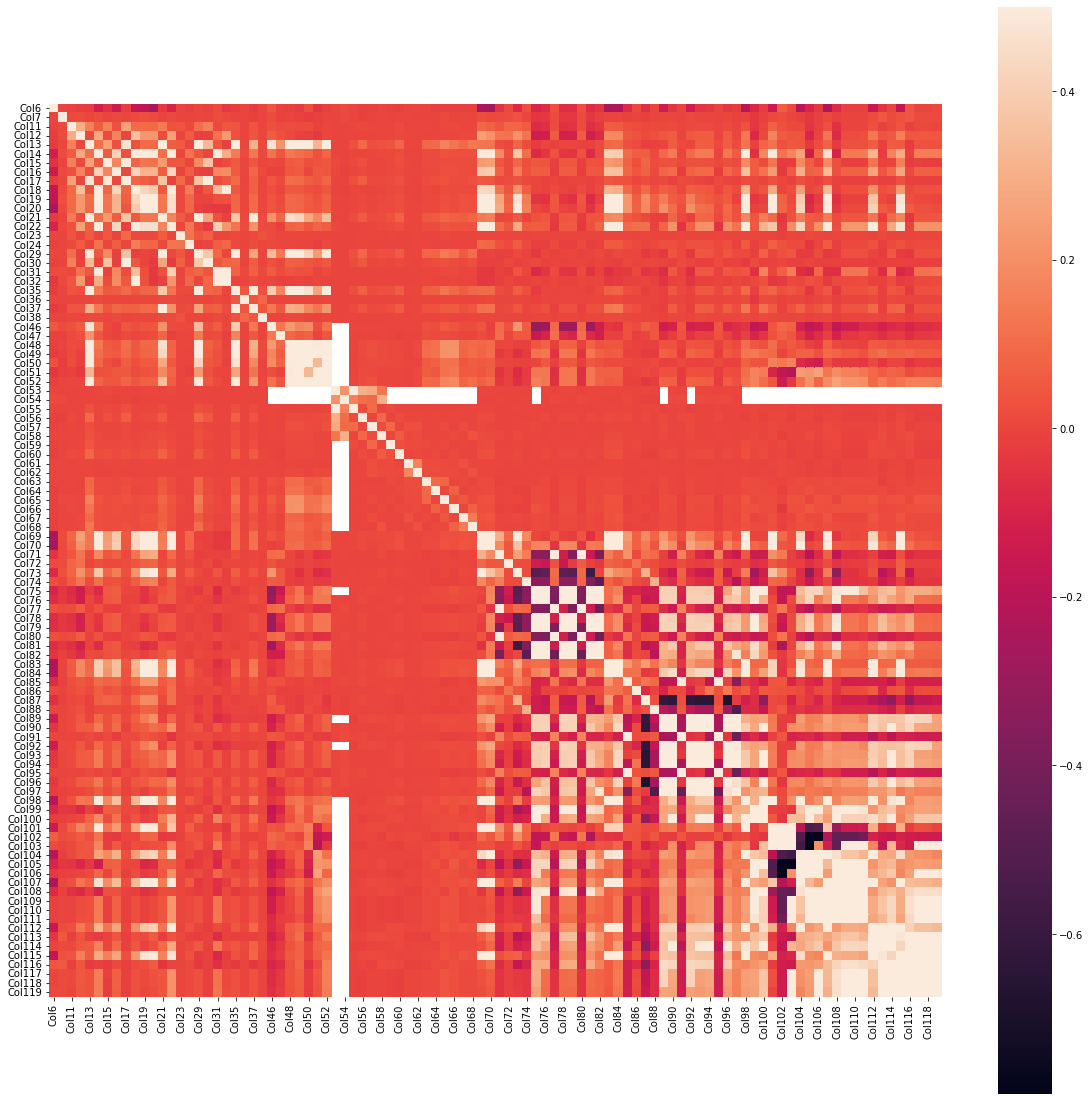

In [13]:
corr_matrix = tf_data.corr()

fig = plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, vmax = .5, square = True)
plt.show()

### Numeric Dimension Distribution

Plotting Histogram Distribution of Numeric Features on 80% of Data Sample = (1453161, 120)


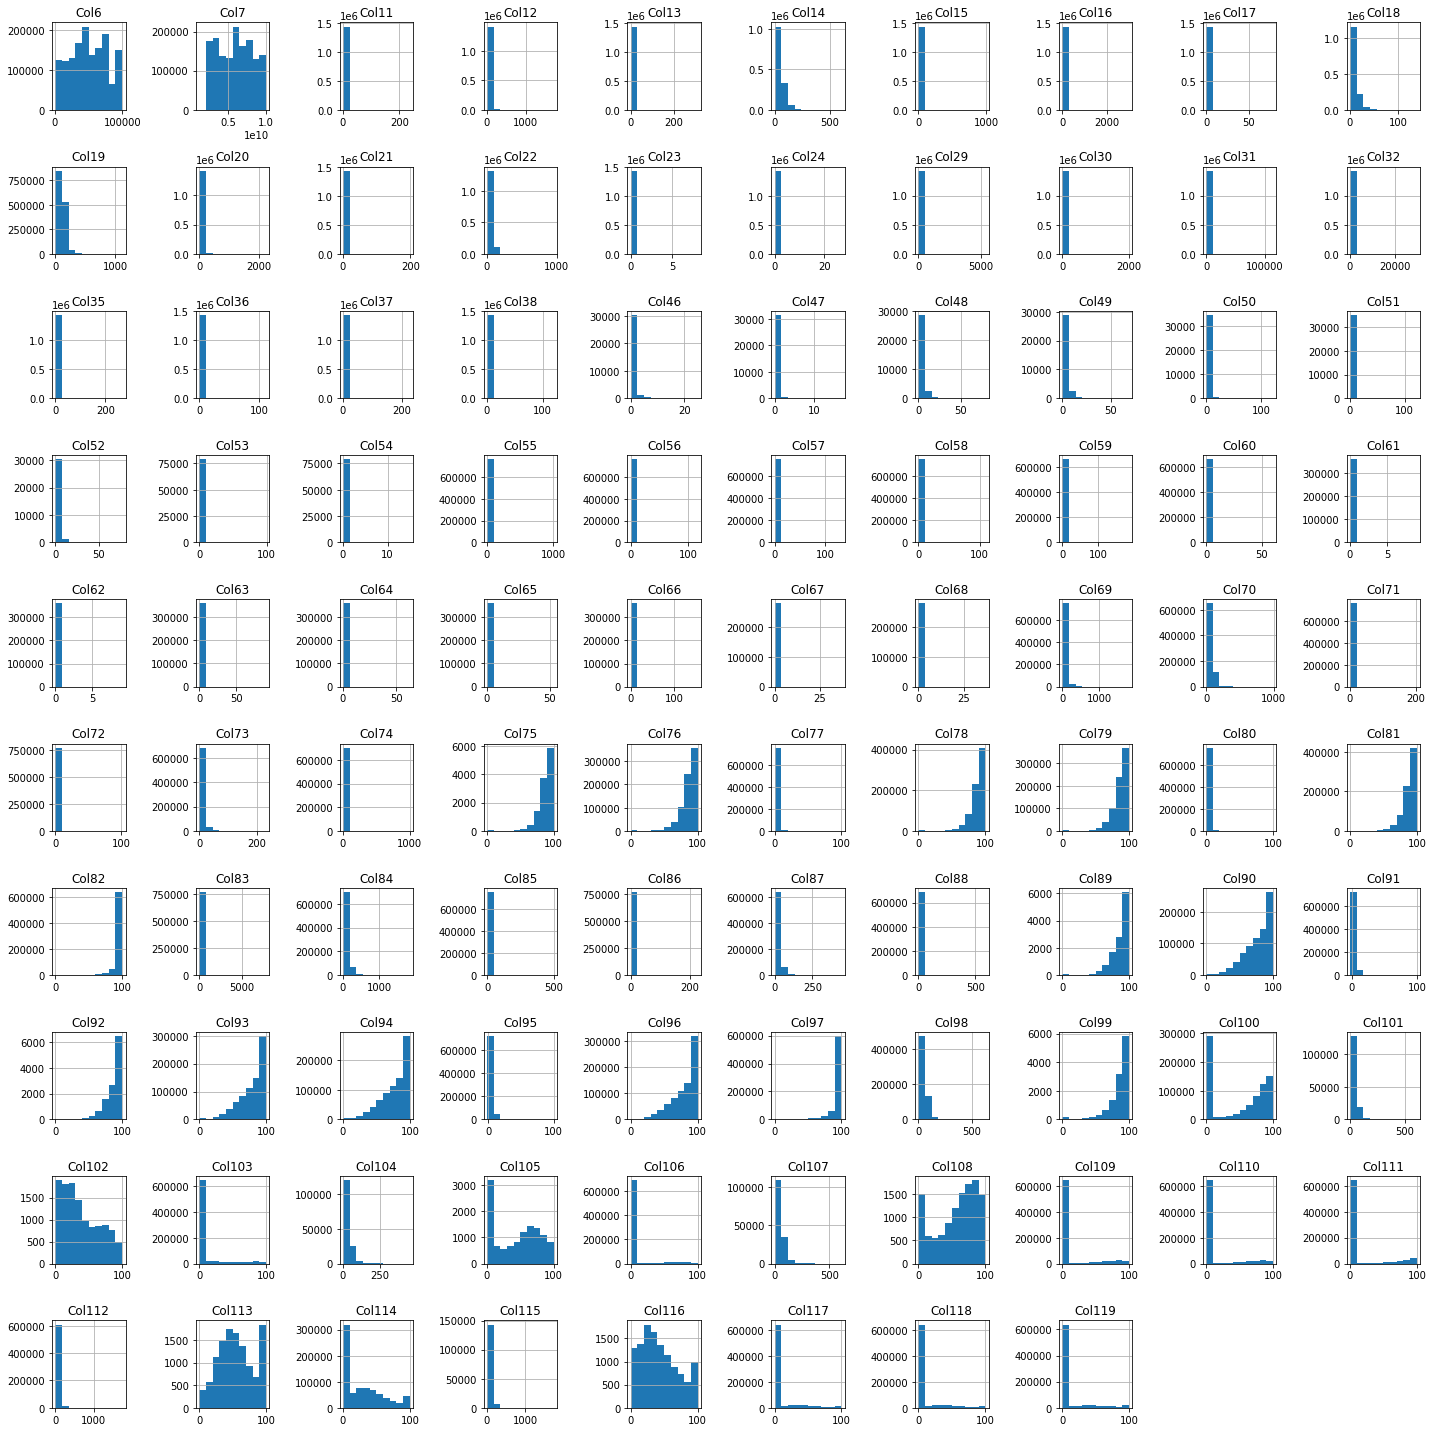

In [14]:
sample_data = tf_data.sample(frac = 0.8, random_state = 365)
print("Plotting Histogram Distribution of Numeric Features \
on 80% of Data Sample = {}".format(sample_data.shape))
sample_data.hist(figsize = (20, 20))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

### Categorical Dimension Distribution

In [15]:
cat_df = tf_data[[col for col in cat_dims]]
cat_df.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col8,Col9,Col10,Col25,...,Col28,Col33,Col34,Col39,Col40,Col41,Col42,Col43,Col44,Col45
0,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,Franklin,Y,Y,N,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,Franklin,Y,Y,N,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,Franklin,Y,Y,N,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,Franklin,Y,Y,N,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,Franklin,Y,Y,N,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# sns.countplot(y='Col1', data=cat_df)

## Feature Engineering